# IntelliRefinder
#### Using machine learning to identify the mortgage refinance opportunity for mortgage lenders

Meng Chen, PhD                                                                                         
Data Science Fellow at Insight Data Science                                              
[LinkedIn](https://www.linkedin.com/in/mlchen/); [GitHub](https://github.com/biomchen)

### The notebook for modeling
### 1. Merge the HMDA and ACS datasets

In [3]:
from refinder import *

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

%matplotlib inline

In [ ]:
hmda_wa_king = pd.read_csv('hmda_final.csv')
hmda_wa_king.set_index('census_tract_number', inplace=True)

In [3]:
acs_wa_king = pd.read_csv('acs_wa_king_final.csv')
acs_wa_king.set_index('Tract name', inplace=True)

In [4]:
hmda_acs_merged = pd.concat([acs_wa_king, hmda_wa_king], axis=1,join='inner')
hmda_acs_merged

,Labor_Force_Participation_Rate,Employment_Population_Ratio,Unemployment_rate,Work_Travel_Less_5_mins,Work_Travel_5_to_9_mins,Work_Travel_10_to_14_mins,Work_Travel_15_to_19_mins,Work_Travel_20_to_24_mins,Work_Travel_25_to_29_mins,Work_Travel_30_to_34_mins,...,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount,applicant_income,Refinance_score,Refinance_opportunity
2.00,67.5,63.2,6.0,0,217,517,407,536,386,633,...,7450,201158,73570,77,1740,2270,20880,7687,0.565275,0
3.00,74.3,72.5,2.5,11,93,95,158,338,83,300,...,5037,117231,69085,77,1039,1598,17967,6687,0.547495,0
4.01,59.7,56.5,4.9,34,114,245,280,759,365,518,...,5170,180269,86720,74,834,932,24737,8799,0.529991,0
4.02,64.6,62.2,3.8,0,157,224,326,380,173,575,...,4729,113300,86939,88,1010,1262,29490,10530,0.650038,1
5.00,62.0,60.6,2.3,9,47,50,117,240,132,307,...,4540,73832,69068,111,1215,1769,24273,10090,0.602544,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326.02,75.6,72.7,3.5,256,199,274,524,529,302,992,...,7763,142168,87075,133,1966,2360,38480,14040,0.578309,0
327.02,76.3,74.4,2.4,53,155,202,342,351,178,483,...,6447,52981,86984,122,1915,2418,30935,12053,0.615758,1
327.03,79.4,75.7,4.6,98,207,65,115,135,86,201,...,1983,25581,86677,93,507,758,27645,9954,0.601538,1
327.04,70.0,65.8,6.0,52,514,288,339,215,130,347,...,6043,65247,87194,109,1645,2092,31809,11823,0.630206,1


In [5]:
hmda_acs_merged.iloc[:20].isnull().sum()[:60]

Labor_Force_Participation_Rate    0
Employment_Population_Ratio       0
Unemployment_rate                 0
Work_Travel_Less_5_mins           0
Work_Travel_5_to_9_mins           0
Work_Travel_10_to_14_mins         0
Work_Travel_15_to_19_mins         0
Work_Travel_20_to_24_mins         0
Work_Travel_25_to_29_mins         0
Work_Travel_30_to_34_mins         0
Work_Travel_35_to_39_mins         0
Work_Travel_40_to_44_mins         0
Work_Travel_45_to_59_mins         0
Work_Travel_60_to_89_mins         0
Work_Travel_90_or_more_mins       0
Married                           0
Widowed                           0
Divorced                          0
Separated                         0
Never_married                     0
Male_population                   0
Female_population                 0
Under_3_years_population          0
3_and_4_years_population          0
5_years_population                0
6_to_8_years_population           0
9_to_11_years_population          0
12_to_14_years_population   

In [6]:
hmda_acs_merged.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 395 entries, 2.0 to 328.0
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Labor_Force_Participation_Rate  395 non-null    object 
 1   Employment_Population_Ratio     395 non-null    object 
 2   Unemployment_rate               395 non-null    object 
 3   Work_Travel_Less_5_mins         395 non-null    int64  
 4   Work_Travel_5_to_9_mins         395 non-null    int64  
 5   Work_Travel_10_to_14_mins       395 non-null    int64  
 6   Work_Travel_15_to_19_mins       395 non-null    int64  
 7   Work_Travel_20_to_24_mins       395 non-null    int64  
 8   Work_Travel_25_to_29_mins       395 non-null    int64  
 9   Work_Travel_30_to_34_mins       395 non-null    int64  
 10  Work_Travel_35_to_39_mins       395 non-null    int64  
 11  Work_Travel_40_to_44_mins       395 non-null    int64  
 12  Work_Travel_45_to_59_mins     

In [9]:
hmda_acs_merged.to_csv('hmda_acs_merged.csv')

### 2. Explortory analyses

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

#### 2.1 Loading the data and drop the loan_purpose_x features
loan_purpose_x features indicates the home loan types: **1**, home purchase; **2**, refinance; **3**, home renovation

In [ ]:
hmda_acs_merged = pd.read_csv('hmda_acs_merged.csv')
hmda_acs_merged.drop(['loan_purpose_1', 'loan_purpose_2', 'loan_purpose_3', 
                      'preapproval_1','preapproval_2', 'preapproval_3'], axis=1, inplace=True)

In [17]:
hmda_acs_merged.iloc[:, 1:-2]

,Labor_Force_Participation_Rate,Employment_Population_Ratio,Unemployment_rate,Work_Travel_Less_5_mins,Work_Travel_5_to_9_mins,Work_Travel_10_to_14_mins,Work_Travel_15_to_19_mins,Work_Travel_20_to_24_mins,Work_Travel_25_to_29_mins,Work_Travel_30_to_34_mins,...,purchaser_type_8,purchaser_type_9,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount,applicant_income
0,67.5,63.2,6.0,0,217,517,407,536,386,633,...,249,341,7450,201158,73570,77,1740,2270,20880,7687
1,74.3,72.5,2.5,11,93,95,158,338,83,300,...,128,281,5037,117231,69085,77,1039,1598,17967,6687
2,59.7,56.5,4.9,34,114,245,280,759,365,518,...,57,79,5170,180269,86720,74,834,932,24737,8799
3,64.6,62.2,3.8,0,157,224,326,380,173,575,...,67,61,4729,113300,86939,88,1010,1262,29490,10530
4,62.0,60.6,2.3,9,47,50,117,240,132,307,...,148,269,4540,73832,69068,111,1215,1769,24273,10090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,75.6,72.7,3.5,256,199,274,524,529,302,992,...,202,331,7763,142168,87075,133,1966,2360,38480,14040
391,76.3,74.4,2.4,53,155,202,342,351,178,483,...,111,149,6447,52981,86984,122,1915,2418,30935,12053
392,79.4,75.7,4.6,98,207,65,115,135,86,201,...,42,34,1983,25581,86677,93,507,758,27645,9954
393,70.0,65.8,6.0,52,514,288,339,215,130,347,...,87,116,6043,65247,87194,109,1645,2092,31809,11823


#### 2.2 Explore relationships among features
#### 2.2.1 With raw data

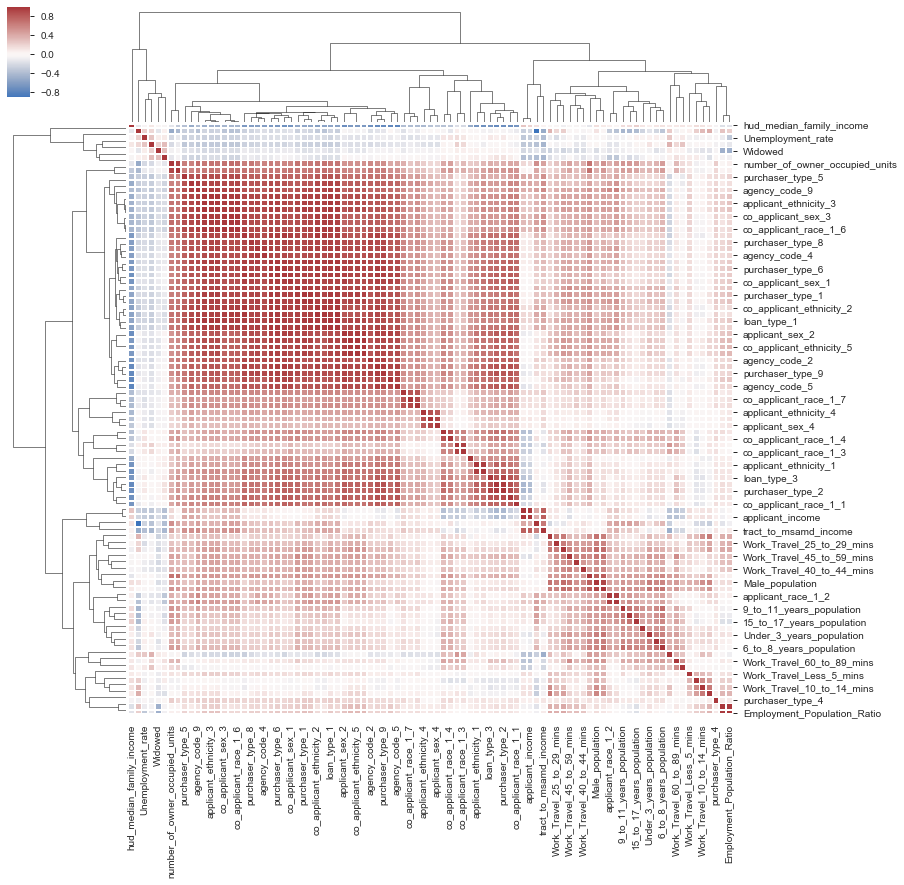

In [18]:
feature_cov = hmda_acs_merged.iloc[:, 1:-2].astype(float).corr()
sns.clustermap(feature_cov, center=0, cmap="vlag", linewidths=.75, figsize=(13, 13))

### 2.2.2 With transformed-data
Since the most of the features do not follow normal distribution, **Ln** transformation will help alliviate that concerns

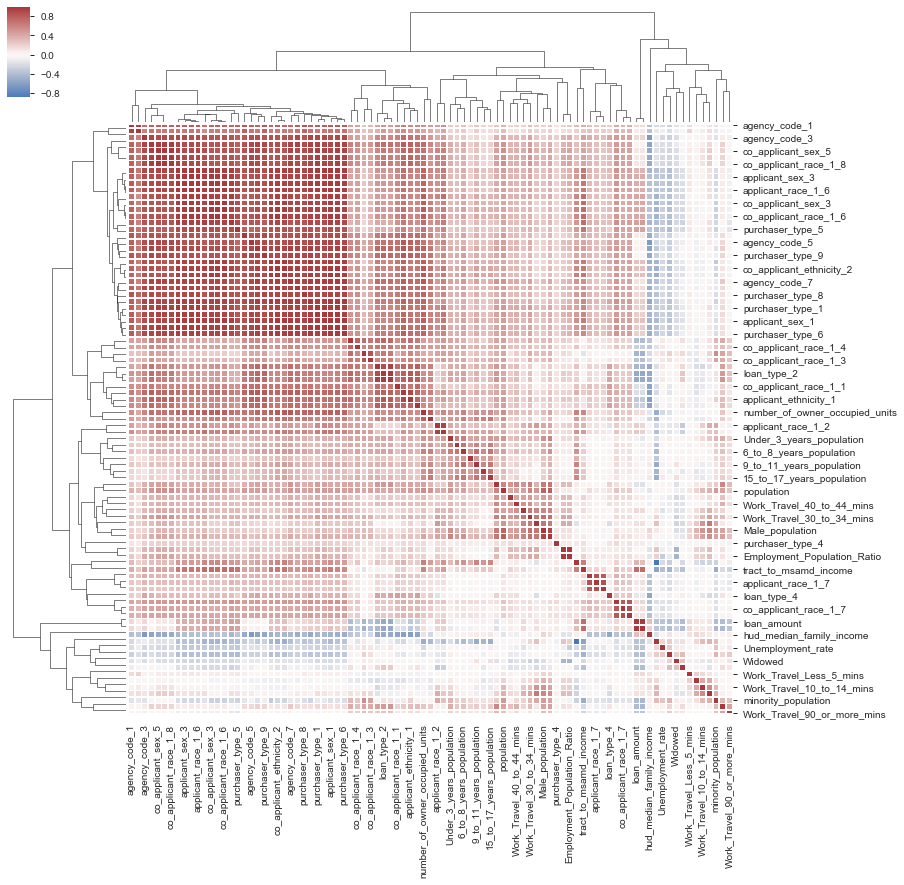

In [19]:
from sklearn.preprocessing import FunctionTransformer
X = hmda_acs_merged.iloc[:, 1:-2]
transformer = FunctionTransformer(np.log1p, validate=True)
X_log1p = transformer.transform(X)
X_log1p = pd.DataFrame(X_log1p, columns=X.columns)
X_log1p_cov = X_log1p.corr()
sns.clustermap(X_log1p_cov, center=0, cmap="vlag", linewidths=.75, figsize=(13, 13))

#### 2.2.3 Pandas profiling the variables of the data

In [ ]:
profile = ProfileReport(X_log1p, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="pd_profiling_report.html")

### 3. Modeling the data for classificaiton
The class of `ProjectModels` includes all functions applied for the project as well as results of validation and visualization of the top features.

#### 3.1 PCA Evaluation

[0.50430199 0.09632731 0.06509227]


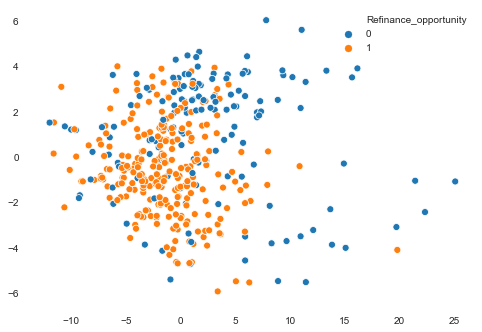

['agency_code_4',
 'Work_Travel_60_to_89_mins',
 'Work_Travel_90_or_more_mins',
 '5_years_population',
 '15_to_17_years_population',
 'loan_type_2',
 'loan_type_3',
 'applicant_race_1_3',
 'co_applicant_race_1_3',
 'purchaser_type_2',
 '3_and_4_years_population',
 '5_years_population',
 '6_to_8_years_population',
 '9_to_11_years_population',
 '12_to_14_years_population',
 '15_to_17_years_population',
 'loan_type_2',
 'loan_type_3',
 'loan_type_4',
 'applicant_race_1_2',
 'co_applicant_race_1_2',
 'purchaser_type_2']

In [21]:
y = hmda_acs_merged.iloc[:,-1]
ProjectModels(X_log1p, y, 'lgr').PCA_eval(3)

In [9]:
X_log1p.shape

(395, 94)

#### 3.2 Logistic regression
With 'l1' regularization, which pentalize the enormous features                           
Similar to the lasso regression as in the linear regression

In [46]:
import pickle
lr_model_nh = ProjectModels(X_log1p, y, 'lgr').get_model()
f_name = 'lr_model_nh.sav'
pickle.dump(lr_model_nh, open(f_name, 'wb'))

In [32]:
ProjectModels(X_log1p, y, 'lgr').cross_validate_results()

{'fit_time': 1.03,
 'score_time': 0.002,
 'test_precision': 0.867,
 'test_recall': 0.836,
 'test_f1': 0.836}

In [24]:
ProjectModels(X_log1p, y, 'lgr').PCA_cross_validate(3)

{'fit_time': 0.002,
 'score_time': 0.002,
 'test_precision': 0.798,
 'test_recall': 0.796,
 'test_f1': 0.736}

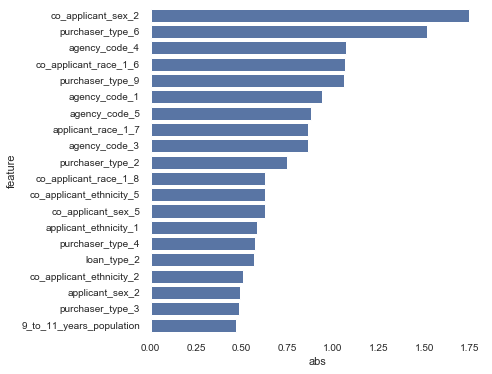

In [25]:
ProjectModels(X_log1p, y, 'lgr').visualize_coefs(20)

In [26]:
lgr_results = ProjectModels(X_log1p, y, 'lgr').predict_results()

#### 3.3 Random forest

In [27]:
rf_model_nh = ProjectModels(X_log1p, y, 'rft').get_model()
f_name = 'rf_model_nh.sav'
pickle.dump(rf_model_nh, open(f_name, 'wb'))

In [28]:
ProjectModels(X_log1p, y, 'rft').cross_validate_results()

{'fit_time': 0.457,
 'score_time': 0.108,
 'test_precision': 0.862,
 'test_recall': 0.888,
 'test_f1': 0.868}

In [31]:
ProjectModels(X_log1p, y, 'rft').PCA_cross_validate(3)

{'fit_time': 0.441,
 'score_time': 0.108,
 'test_precision': 0.814,
 'test_recall': 0.848,
 'test_f1': 0.802}

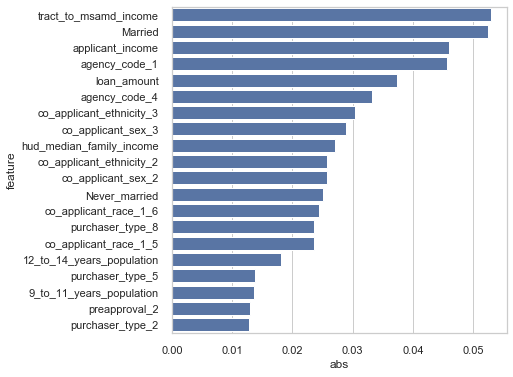

In [311]:
ProjectModels(X_log1p, y, 'rft').visualize_coefs(20)

In [264]:
rft_results = ProjectModels(X_log1p, y, 'rft').predict_results()

#### Dropping off the ethical related features

In [32]:
hmda_acs_merged = pd.read_csv('hmda_acs_merged.csv')
ethical_related = hmda_acs_merged.columns[41:80]
hmda_acs_merged.drop(ethical_related, axis=1, inplace=True)

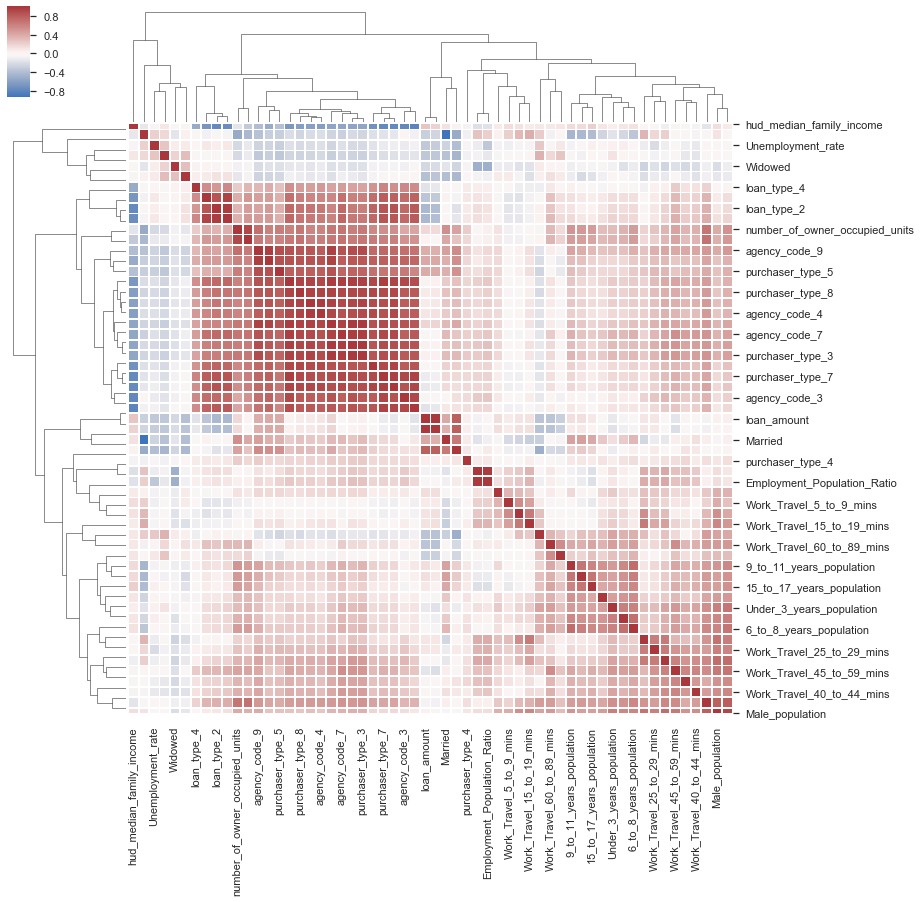

In [33]:
feature_cov = hmda_acs_merged.iloc[:, 1:-2].astype(float).corr()
sns.clustermap(feature_cov, center=0, cmap="vlag", linewidths=.75, figsize=(13, 13))

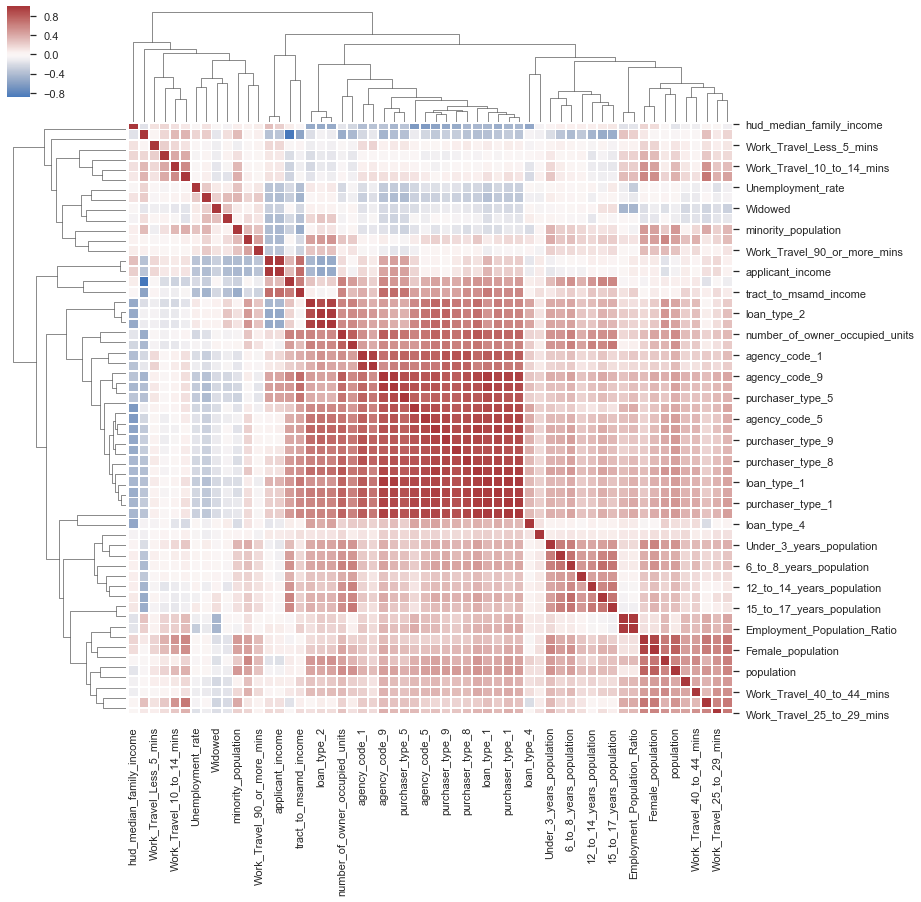

In [34]:
from sklearn.preprocessing import FunctionTransformer
X = hmda_acs_merged.iloc[:, 1:-2]
transformer = FunctionTransformer(np.log1p, validate=True)
X_log1p = transformer.transform(X)
X_log1p = pd.DataFrame(X_log1p, columns=X.columns)
X_log1p_cov = X_log1p.corr()
sns.clustermap(X_log1p_cov, center=0, cmap="vlag", linewidths=.75, figsize=(13, 13))

#### PCA evalutaion

[0.4082582  0.11867884 0.08086555]


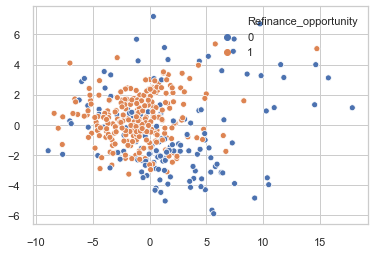

['agency_code_1',
 'agency_code_2',
 'agency_code_4',
 'agency_code_5',
 'loan_type_2',
 'loan_type_3',
 'purchaser_type_2',
 'purchaser_type_6',
 'purchaser_type_9',
 'Work_Travel_90_or_more_mins',
 '3_and_4_years_population',
 '5_years_population',
 '6_to_8_years_population',
 '9_to_11_years_population',
 '12_to_14_years_population',
 '15_to_17_years_population',
 'agency_code_1',
 'agency_code_4',
 'Work_Travel_Less_5_mins',
 '5_years_population',
 'loan_type_2',
 'loan_type_3',
 'loan_type_4',
 'purchaser_type_2']

In [35]:
y = hmda_acs_merged.iloc[:,-1]
ProjectModels(X_log1p, y, 'lgr').PCA_eval(3)

#### Logistic regression

In [36]:
lr_model_hf = ProjectModels(X_log1p, y, 'lgr').get_model()
f_name = 'lf_model_hf.sav'
pickle.dump(lr_model_hf, open(f_name, 'wb'))

In [37]:
ProjectModels(X_log1p, y, 'lgr').cross_validate_results()

{'fit_time': 0.375,
 'score_time': 0.002,
 'test_precision': 0.862,
 'test_recall': 0.828,
 'test_f1': 0.822}

In [38]:
ProjectModels(X_log1p, y, 'lgr').PCA_cross_validate(3)

{'fit_time': 0.002,
 'score_time': 0.002,
 'test_precision': 0.75,
 'test_recall': 0.84,
 'test_f1': 0.778}

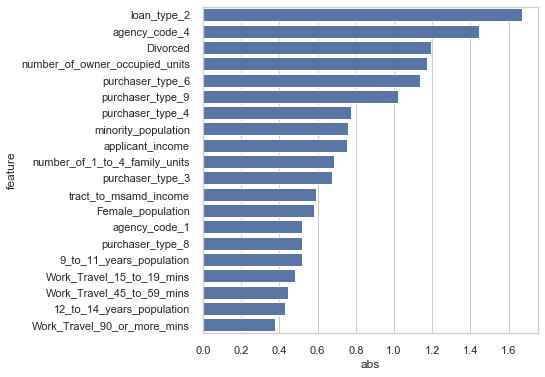

In [39]:
ProjectModels(X_log1p, y, 'lgr').visualize_coefs(20)

#### Random Forest

In [40]:
rf_model_hf = ProjectModels(X_log1p, y, 'rft').get_model()
f_name = 'rf_model_hf.sav'
pickle.dump(rf_model_hf, open(f_name, 'wb'))

In [41]:
ProjectModels(X_log1p, y, 'rft').cross_validate_results()

{'fit_time': 0.479,
 'score_time': 0.109,
 'test_precision': 0.858,
 'test_recall': 0.855,
 'test_f1': 0.854}

In [42]:
ProjectModels(X_log1p, y, 'rft').PCA_cross_validate(3)

{'fit_time': 0.448,
 'score_time': 0.108,
 'test_precision': 0.766,
 'test_recall': 0.828,
 'test_f1': 0.779}

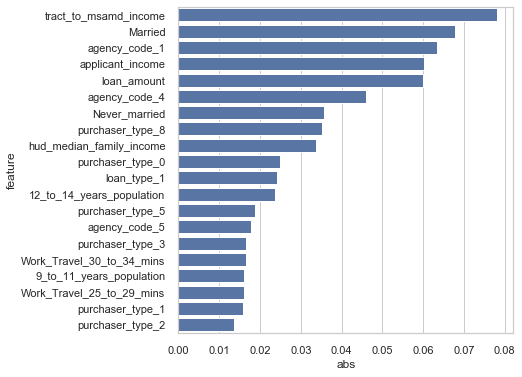

In [43]:
ProjectModels(X_log1p, y, 'rft').visualize_coefs(20)

#### 3.3 Comparing the predicted results between logistic regression and random forest

In [239]:
all_results = pd.DataFrame([lgr_results, rft_results, y]).T

dfs = []
for _, row in all_results.iterrows():
    df1 = abs(row[0] - row[2])
    df2 = abs(row[1] - row[2])
    if df1 == df2:
        dfs.append(0)
    else:
        dfs.append(1)

In [240]:
def get_diff_per(pred1, pred2, y):
    dfs = []
    results = pd.DataFrame([pred1, pred2, y]).T
    for _, row in results.iterrows():
        df1 = abs(row[0] - row[2])
        df2 = abs(row[1] - row[2])
        if df1 == df2:
            dfs.append(0)
        else:
            dfs.append(1)
    dfs_per = pd.Series(dfs).value_counts()[1]/len(dfs)*100
    dfs_per = round(dfs_per, 3)
    return '{}%'.format(dfs_per)

In [241]:
get_diff_per(lgr_results, rft_results, y)

'8.608%'

#### Experiments on `Stacking` algorithm

In [242]:
from sklearn.ensemble import StackingClassifier

In [243]:
lr = LogisticRegression(random_state=50, 
                        max_iter=10000, 
                        penalty='l1', 
                        solver='saga')
rf = RandomForestClassifier(n_estimators=100,
                            max_leaf_nodes=16,
                            n_jobs=-1)
        
clf = StackingClassifier(estimators=[('lr', lr)],
                         final_estimator=rf)

In [244]:
scoring = ['precision', 'recall', 'f1']
scores = cross_validate(clf, X_log1p, y, 
                        cv=5,
                        scoring=scoring, 
                        return_train_score=False)

In [245]:
np.mean(scores['test_recall'])

0.8479183673469388

### Variance Inflation Factor (VIF)
VIF is a measure for the increase of the variance of the parameter estimates if an additional variable, given by exog_idx is added to the linear regression. It is a measure for multicollinearity of the design matrix, exog.

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X_log1p.columns
vif = [variance_inflation_factor(X_log1p[variables].values, variables.get_loc(var)) for var in variables]

/Users/mengchen/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [12]:
vif_results = pd.DataFrame([variables, vif]).T
vif_results.columns = ['feature', 'VIF']

In [13]:
def get_VIFs(features):
    variabels = features.columns
    vifs = [variance_inflation_factor(features[variables].values, 
                                     variables.get_loc(var)) for var in variables]
    vifs_df = pd.DataFrame([variabels, vifs]).T
    vifs_df.columns = ['feature', 'VIF']
    return vifs_df

def select_feature(features, vif_threshold):
    df = get_VIFs(features)
    rows = []
    for _, row in df.iterrows():
        if row[1] <= vif_threshold:
            rows.append(row)
    return rows

In [14]:
features_vif = pd.DataFrame(select_feature(X_log1p, 10))

In [15]:
X_vif = hmda_acs_merged.iloc[:, 1:-2][features_vif['feature']]

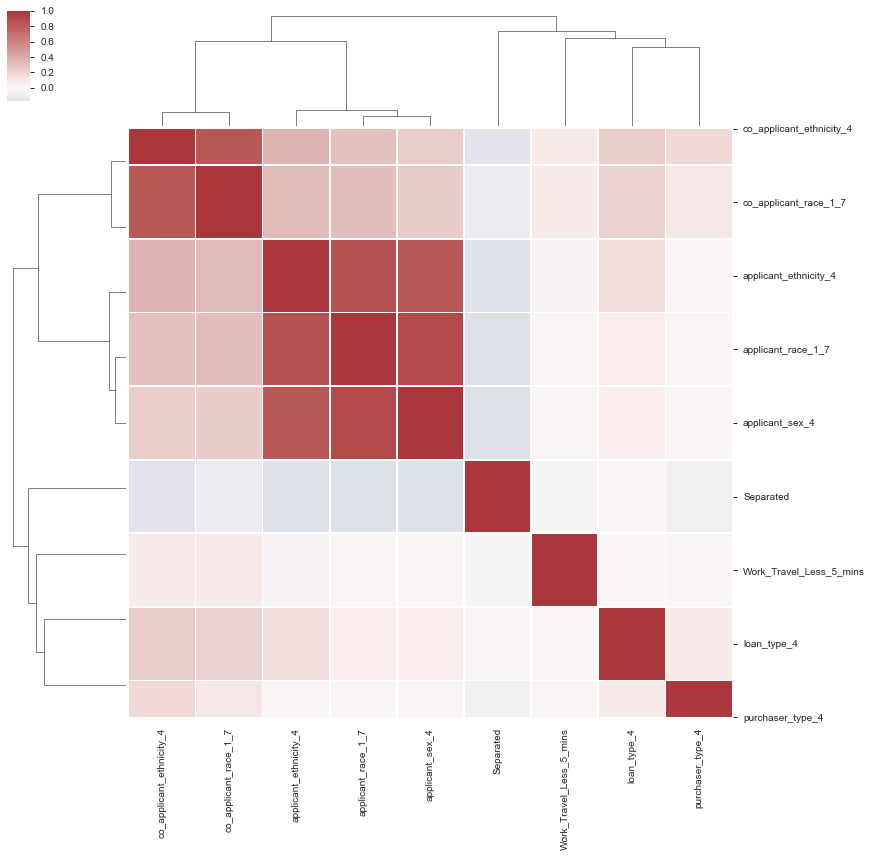

In [16]:
X_vif_cov = X_vif.corr()
sns.clustermap(X_vif_cov, center=0, cmap="vlag", linewidths=.75, figsize=(13, 13))

In [1]:
scores = cross_val_score(clf, X_vif, y, cv=5)
print(scores)

NameError: name 'cross_val_score' is not defined

#### Logistic regression

### Recursive Features Elimination (RFE)

In [42]:
from sklearn.feature_selection import RFE

y = hmda_acs_merged.iloc[:,-1]
clf = LogisticRegression(max_iter=1000)
rfe = RFE(clf, 10)

In [43]:
fit = rfe.fit(X_log1p, y)
feat_bool = fit.support_
print('The top 10 features are ',X_log1p.columns[feat_bool])

The top 10 features are  Index(['agency_code_4', 'loan_purpose_1', 'loan_purpose_3', 'preapproval_1',
       'preapproval_2', 'co_applicant_ethnicity_3', 'co_applicant_race_1_6',
       'applicant_sex_2', 'co_applicant_sex_2', 'purchaser_type_3'],
      dtype='object')


In [44]:
rfe = RFE(clf, 10)
fit = rfe.fit(X_vif, y)
feat_bool = fit.support_
print('The top 10 features are ',X_vif.columns[feat_bool])

The top 10 features are  Index(['Work_Travel_Less_5_mins', 'Separated', 'loan_type_4',
       'applicant_ethnicity_4', 'co_applicant_ethnicity_4',
       'applicant_race_1_7', 'co_applicant_race_1_7', 'applicant_sex_4',
       'purchaser_type_4'],
      dtype='object')


#### Exploration of the data of minority groups

In [53]:
hmda_acs_merged.columns

Index(['Labor_Force_Participation_Rate', 'Employment_Population_Ratio',
       'Unemployment_rate', 'Work_Travel_Less_5_mins',
       'Work_Travel_5_to_9_mins', 'Work_Travel_10_to_14_mins',
       'Work_Travel_15_to_19_mins', 'Work_Travel_20_to_24_mins',
       'Work_Travel_25_to_29_mins', 'Work_Travel_30_to_34_mins',
       'Work_Travel_35_to_39_mins', 'Work_Travel_40_to_44_mins',
       'Work_Travel_45_to_59_mins', 'Work_Travel_60_to_89_mins',
       'Work_Travel_90_or_more_mins', 'Married', 'Widowed', 'Divorced',
       'Separated', 'Never_married', 'Male_population', 'Female_population',
       'Under_3_years_population', '3_and_4_years_population',
       '5_years_population', '6_to_8_years_population',
       '9_to_11_years_population', '12_to_14_years_population',
       '15_to_17_years_population', 'agency_code_1', 'agency_code_2',
       'agency_code_3', 'agency_code_4', 'agency_code_5', 'agency_code_7',
       'agency_code_9', 'loan_type_1', 'loan_type_2', 'loan_type_3',
    

#### 3 groups for categorizing the ethnicity
    1: Hispanic or Latino
    2: Not Hispanic or Latino
    3: Not provided 
    4: Not applicable
    5: No co-applicant (for co-applicant_ethnicity feature)

#### 7 groups to categorize the race
    1: Alaska and American Indian Natives
    2: Asia
    3: African American
    4: Native Hawaii and Pacific Island
    5: White
    6: Not provided
    7: Not appliable
    8: No co-applicant (for co-applicant_race feature)

In [58]:
ethnicity_groups = ['applicant_ethnicity_1', 'applicant_ethnicity_2', 
                    'applicant_ethnicity_3', 'applicant_ethnicity_4',
                    'co_applicant_ethnicity_1', 'co_applicant_ethnicity_2',
                    'co_applicant_ethnicity_3', 'co_applicant_ethnicity_4',
                    'co_applicant_ethnicity_5']
race_groups = ['applicant_race_1_1', 'applicant_race_1_2',
               'applicant_race_1_3', 'applicant_race_1_4', 
               'applicant_race_1_5', 'applicant_race_1_6', 
               'applicant_race_1_7', 'co_applicant_race_1_1',
               'co_applicant_race_1_2', 'co_applicant_race_1_3',
               'co_applicant_race_1_4', 'co_applicant_race_1_5',
               'co_applicant_race_1_6', 'co_applicant_race_1_7',
               'co_applicant_race_1_8']

In [70]:
hispanic_population = hmda_acs_merged[['applicant_ethnicity_1', 'co_applicant_ethnicity_1']].sum(axis=1)
hispanic_data = pd.concat([hispanic_population, hmda_acs_merged['Refinance_score']], axis=1)
hispanic_data.columns = ['hispanic_population', 'Refinance_score']

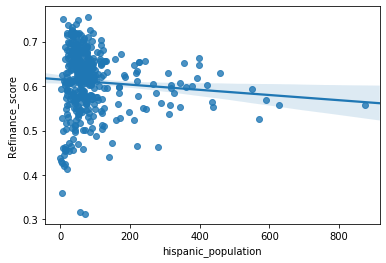

In [71]:
sns.regplot(x='hispanic_population', 
           y='Refinance_score', 
           data=hispanic_data)

In [72]:
minority_race_population = hmda_acs_merged[['applicant_race_1_1', 'applicant_race_1_2',
                                            'applicant_race_1_3', 'applicant_race_1_4',
                                            'co_applicant_race_1_1','co_applicant_race_1_2', 
                                            'co_applicant_race_1_3','co_applicant_race_1_4']].sum(axis=1)
minority_race_data = pd.concat([minority_race_population, hmda_acs_merged['Refinance_score']], axis=1)
minority_race_data.columns = ['minority_race_population', 'Refinance_score']

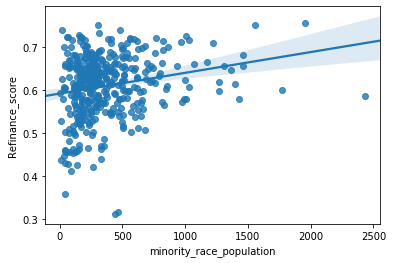

In [73]:
sns.regplot(x='minority_race_population', 
            y='Refinance_score', 
            data=minority_race_data)

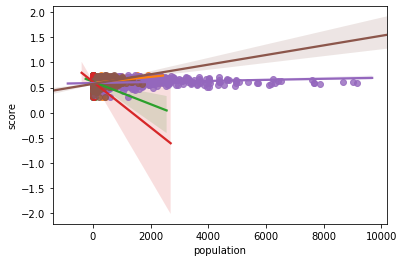

In [81]:
for j in range(1, 7):
    name1 = ['applicant_race_1_{0}'.format(j)]
    name2 = ['co_applicant_race_1_{0}'.format(j)]
    population = hmda_acs_merged[name1+name2].sum(axis=1)
    data = pd.concat([population, hmda_acs_merged['Refinance_score']], axis=1)
    data.columns = ['population', 'score']
    sns.regplot(x='population',
                y='score',
                data=data)

In [78]:
ak_population = hmda_acs_merged[['applicant_race_1_1','co_applicant_race_1_1']].sum(axis=1)
ak_data = pd.concat([ak_population, hmda_acs_merged['Refinance_score']], axis=1)
ak_data.columns = ['ak_population', 'Refinance_score']

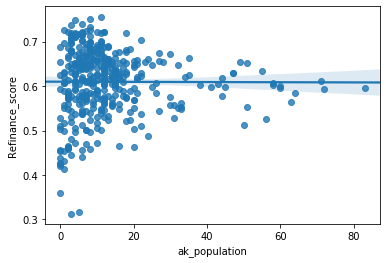

In [79]:
sns.regplot(x='ak_population', 
            y='Refinance_score', 
            data=ak_data)

In [74]:
asia_population = hmda_acs_merged[['applicant_race_1_2','co_applicant_race_1_2']].sum(axis=1)
asia_data = pd.concat([asia_population, hmda_acs_merged['Refinance_score']], axis=1)
asia_data.columns = ['asia_population', 'Refinance_score']

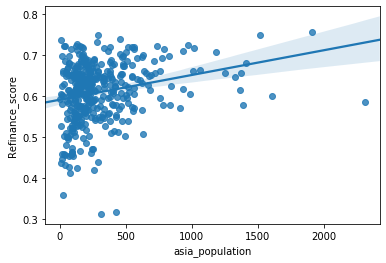

In [76]:
sns.regplot(x='asia_population', 
            y='Refinance_score', 
            data=asia_data)

In [ ]:
asia_population = hmda_acs_merged[['applicant_race_1_2','co_applicant_race_1_2']].sum(axis=1)
asia_data = pd.concat([asia_population, hmda_acs_merged['Refinance_score']], axis=1)
asia_data.columns = ['asia_population', 'Refinance_score']

#### Zip to census tract

In [52]:
z2t_loc = '../data/t2z/zip_tract_122017.xlsx'

In [54]:
z2t_df = pd.read_excel(z2t_loc)

In [6]:
zt = z2t_df[['zip', 'tract']]

In [126]:
def zip2tract(loc, state_code):
    z2t = {}
    zt = []
    df = pd.read_excel(loc)
    df.columnns = ['zip', 'tract']
    for z, t in zip(df['zip'], df['tract']):
        if str(t)[:2] == str(state_code):
            zt.append([z, str(t)[-5:]])
        else:
            continue
    zt = pd.DataFrame(zt, columns=['zip', 'tract'])
    # if you tract number is 5 digits, you don't need to /100
    # however, you might want to change the tract from str to int
    zt['tract'] = zt['tract'].astype(float)/100 
    z_unique =  zt['zip'].unique()
    for _, row in zt.iterrows():
        ts = zt[zt['zip'] == row[0]]
        z2t.update({row[0]: ts['tract']})
    return z2t

In [127]:
zip2tract(z2t_loc, 53)[98117]

/Users/mengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


57      17.02
58      34.00
643     17.01
1666    33.00
1667    30.00
2031    16.00
2032    29.00
2033    31.00
2432    32.00
2601    15.00
3015    14.00
3114    35.00
Name: tract, dtype: float64

In [68]:
def get_tract(path='../data/t2z/zip_tract_122017.xlsx'):
    zipcode = input()
    df = pd.read_excel(path)
    df = df[['zip', 'tract']]
    print(df)
    zip_df = df[df['zip'] == int(zipcode)]
    return zip_df['tract']

In [130]:
def get_tract2():
    zipcode = input()
    zipcode = int(zipcode)
    return zip2tract(z2t_loc, 53)[zipcode]

In [79]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen, Request

In [112]:
def get_zipcodes(link):
    zipcodes = []
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}
    req = Request(url=link, headers=headers) 
    html = urlopen(req).read()
    soup = bs(html, 'html.parser')
    lines = soup.findAll('a')
    for code in a_files[73:165]: # this will be changed to different lines
        zipcodes.append(int(code.string))
    return zipcodes

In [115]:
zipcodes_king = get_zipcodes('https://www.zillow.com/browse/homes/wa/king-county/')

In [118]:
zipcodes_king = pd.DataFrame(zipcodes_king, columns=['zip'])
zipcodes_king.to_csv('../data/t2z/zipcodes_king.csv')